In [1]:
import numpy as np

In [2]:
import tensorflow as tf

In [3]:
from keras.datasets import mnist
from keras.preprocessing.image import load_img, array_to_img
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense

import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [4]:
mnist.load_data()

11493376/11490434 [==============================] - 2s 0us/step


((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [5]:
(x_train, y_train_original), (x_test, y_test_original) = mnist.load_data()

In [6]:
print(x_train.shape)

(60000, 28, 28)


In [7]:
print(y_train_original.shape)

(60000,)


In [8]:
x_train[0].shape

(28, 28)

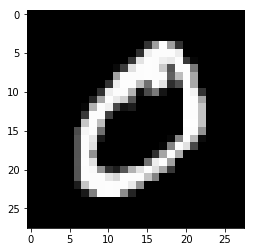

In [10]:
plt.imshow(x_train[1], cmap = 'gray')

In [11]:
y_train_original[1]

0

In [12]:
image_weight = 28
image_height = 28

In [13]:
x_train = x_train.reshape(60000, image_weight * image_height)
x_test = x_test.reshape(10000, image_weight * image_height)
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [14]:
print(x_train[0])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0   0   0   0   

In [15]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255.0
x_test /= 255.0
print(x_train[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [16]:
print(y_train_original.shape)
print(y_test_original.shape)

(60000,)
(10000,)


In [17]:
y_train = to_categorical(y_train_original, 10)
y_test = to_categorical(y_test_original, 10)
print(y_train.shape)
print(y_test.shape)

(60000, 10)
(10000, 10)


In [18]:
model = Sequential()

In [19]:
model.add(Dense(512, activation = 'relu', input_shape = (784,)))
model.add(Dense(512, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))


In [20]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [21]:
784*512+512

401920

In [22]:
512*512+512

262656

In [23]:
10*512+10

5130

In [24]:
fit = model.fit(x_train, y_train, epochs = 26, validation_data = (x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/26
60000/60000 [==============================] - 75s 1ms/step - loss: 0.1830 - accuracy: 0.9440 - val_loss: 0.1282 - val_accuracy: 0.9611
Epoch 2/26
60000/60000 [==============================] - 67s 1ms/step - loss: 0.0808 - accuracy: 0.9749 - val_loss: 0.0813 - val_accuracy: 0.9749
Epoch 3/26
60000/60000 [==============================] - 73s 1ms/step - loss: 0.0568 - accuracy: 0.9820 - val_loss: 0.0942 - val_accuracy: 0.9730
Epoch 4/26
60000/60000 [==============================] - 96s 2ms/step - loss: 0.0420 - accuracy: 0.9868 - val_loss: 0.0740 - val_accuracy: 0.9776
Epoch 5/26
60000/60000 [==============================] - 76s 1ms/step - loss: 0.0355 - accuracy: 0.9886 - val_loss: 0.0711 - val_accuracy: 0.9802
Epoch 6/26
60000/60000 [==============================] - 88s 1ms/step - loss: 0.0260 - accuracy: 0.9919 - val_loss: 0.0662 - val_accuracy: 0.9836
Epoch 7/26
60000/60000 [==============================] - 73s 1ms/st

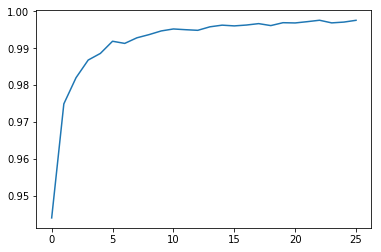

In [25]:
plt.plot(fit.history['accuracy'])

In [26]:
score = model.evaluate(x_test, y_test)

10000/10000 [==============================] - 3s 259us/step


In [27]:
score

[0.15720269676821602, 0.9829000234603882]